# Name - Amol Dattatray Sangar
# Username - asangar

In [1]:
import random
import numpy as np

# Problem 1
Suppose you are given two sequences D1 and D2 of n elements, possibly containing duplicates,on which a total order relation is defined. Describe an efficient algorithm for determining if D1 and D2 contain the same set of elements. What is the running time of this method?


In [2]:
def is_same(D1,D2):
  count = set()
  for d1 in D1:
      count.add(d1)
  print("\nD1 Unique:",count)
  
  flag = True
  for d2 in D2:
    if d2 in count:
      pass
    else:
      # print("Not Same Set Of Elements")
      return False

  return True

In [3]:
d1= [1,2,3,3,5,9]
d2= [1,2,3,5,5,9]

print("D1:",d1)
print("D2:",d2)

print("\nIs Same Set of Elements?",is_same(d1,d2))

D1: [1, 2, 3, 3, 5, 9]
D2: [1, 2, 3, 5, 5, 9]

D1 Unique: {1, 2, 3, 5, 9}

Is Same Set of Elements? True


In [4]:
d1= [1,2,3,3,5,9]
d2= [1,2,3,4,5,9]

print("D1:",d1)
print("D2:",d2)

print("\nIs Same Set of Elements?",is_same(d1,d2))

D1: [1, 2, 3, 3, 5, 9]
D2: [1, 2, 3, 4, 5, 9]

D1 Unique: {1, 2, 3, 5, 9}

Is Same Set of Elements? False


TIme Complexity - O(n) since there is only one for loop to iterate over all the elements and the lookup time of a Set is O(1).

# Problem 2
Given an array D of n integers in the range [0, n^2−1], describe a simple method for sorting D in O(n) time.

In [5]:
def count_sort(arr, n, exp):
    output = [0] * n
    count = [0] * n
    for i in range(n):
      count[i] = 0
 
    for i in range(n):
      index = (arr[i] // exp) % n 
      count[index] += 1

    for i in range(1, n):
      count[i] += count[i - 1]

    for i in range(n - 1, -1, -1):
      index = (arr[i] // exp) % n 
      output[count[index] - 1] = arr[i]
      count[index] -= 1

    for i in range(n):
      arr[i] = output[i]
 
def sort(arr, n) :
    count_sort(arr, n, 1)
    print("Iteration 1:",arr)
 
    count_sort(arr, n, n)
    print("Iteration 2:",arr)

In [6]:
# Array size is 12, therefore elements should be from 0 to 143
n = 12
no_of_digits = len(str(n**2 - 1))
print("Max No of Digits:",no_of_digits)

arr = [random.randint(0, n**2-1) for _ in range(n) ]
print("\nRandom Array:",arr)
print("")

sort(arr, n)
  
print("\nSorted array is",arr)

Max No of Digits: 3

Random Array: [51, 32, 41, 61, 30, 24, 28, 65, 133, 81, 78, 114]

Iteration 1: [24, 61, 133, 51, 28, 41, 65, 30, 78, 114, 32, 81]
Iteration 2: [24, 28, 30, 32, 41, 51, 61, 65, 78, 81, 114, 133]

Sorted array is [24, 28, 30, 32, 41, 51, 61, 65, 78, 81, 114, 133]


Radix Sort takes O(d*(n+b)) time where b is the base for representing numbers.

n^2-1 is the maximum possible value which means the value of d would be O(logb(n)). So overall time complexity is O((n+b)*O(logb(n)).

Now if we set b as n, the value of O(logb(n)) becomes O(1) and overall time complexity becomes O(n). 

# Problem 3
Given a sequence D of n elements, on which a total order relation is defined, describe an efficient method for determining whether there are two equal elements in D. What is the running time of your method?

In [7]:
def check_duplicate(arr):
  count_dict = {}
  for ele in arr:
    if ele in count_dict:
      return f"Duplicate element found {ele}"
    else:
      count_dict[ele] = None
  return "No duplicates are present in the array"

In [8]:
arr = [random.randint(0,10) for _ in range(10) ]
print("Random Array:",arr)

print(check_duplicate(arr))

Random Array: [5, 5, 2, 8, 2, 9, 8, 5, 2, 5]
Duplicate element found 5


In [9]:
# to choose multiple random items without including the duplicates
d1 = random.sample(range(0,10),k=10)
print(check_duplicate(d1))

No duplicates are present in the array


Running time is O(n) since there is only one 'for loop' to check all elements in another dict and dict lookup time is O(1)

# Problem 4 - Merge Sort
Implement a bottom-up merge-sort for a collection of items by placing each item in its own queue, and then repeatedly merging pairs of queues until all items are sorted within a single queue.

In [10]:
def merge_list(list1, list2):
    list1.sort()
    list2.sort()

    res=[]
    i=0
    j=0
    while (i<len(list1) and j<len(list2)):
      if(list1[i] < list2[j]):
        res.append(list1[i])
        i+=1
      else:
        res.append(list2[j])
        j+=1

    while i<len(list1):
      res.append(list1[i])
      i+=1
    
    while j<len(list2):
      res.append(list2[j])
      j+=1 

    return res

In [11]:
def merge(data):
  single_data_list=[]

  for i,val in enumerate(data):
    single_data_list.append([val])
  
  while len(single_data_list) != 1:
    print(f"Data before performing merge operation on cell size {len(single_data_list[0])} - {single_data_list}")
    temp=[]
    for i in range(0,len(single_data_list)-1,2):
      temp.append(merge_list(single_data_list[i],single_data_list[i+1]))
      print(temp)
    
    if(len(single_data_list)%2 != 0):
      temp.append(single_data_list[len(single_data_list)-1])
      print(temp)
    
    single_data_list = temp

    print("Data after merge operation", single_data_list)
    print("")
  
  return [x for x in single_data_list[0]]

In [12]:
arr = [random.randint(0,50) for _ in range(20) ]
print("Random Input Array:",arr)
print("")

print("Data after sorting",merge(arr))

Random Input Array: [48, 29, 47, 32, 5, 49, 25, 2, 7, 9, 47, 42, 27, 8, 39, 30, 20, 49, 0, 50]

Data before performing merge operation on cell size 1 - [[48], [29], [47], [32], [5], [49], [25], [2], [7], [9], [47], [42], [27], [8], [39], [30], [20], [49], [0], [50]]
[[29, 48]]
[[29, 48], [32, 47]]
[[29, 48], [32, 47], [5, 49]]
[[29, 48], [32, 47], [5, 49], [2, 25]]
[[29, 48], [32, 47], [5, 49], [2, 25], [7, 9]]
[[29, 48], [32, 47], [5, 49], [2, 25], [7, 9], [42, 47]]
[[29, 48], [32, 47], [5, 49], [2, 25], [7, 9], [42, 47], [8, 27]]
[[29, 48], [32, 47], [5, 49], [2, 25], [7, 9], [42, 47], [8, 27], [30, 39]]
[[29, 48], [32, 47], [5, 49], [2, 25], [7, 9], [42, 47], [8, 27], [30, 39], [20, 49]]
[[29, 48], [32, 47], [5, 49], [2, 25], [7, 9], [42, 47], [8, 27], [30, 39], [20, 49], [0, 50]]
Data after merge operation [[29, 48], [32, 47], [5, 49], [2, 25], [7, 9], [42, 47], [8, 27], [30, 39], [20, 49], [0, 50]]

Data before performing merge operation on cell size 2 - [[29, 48], [32, 47], [5, 4

Sequential Array Test for Merge Sort

In [13]:
arr = [i for i in range(20) ]
print("Sequential Input Array:",arr)
print("")

print("Data after sorting",merge(arr))

Sequential Input Array: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

Data before performing merge operation on cell size 1 - [[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19]]
[[0, 1]]
[[0, 1], [2, 3]]
[[0, 1], [2, 3], [4, 5]]
[[0, 1], [2, 3], [4, 5], [6, 7]]
[[0, 1], [2, 3], [4, 5], [6, 7], [8, 9]]
[[0, 1], [2, 3], [4, 5], [6, 7], [8, 9], [10, 11]]
[[0, 1], [2, 3], [4, 5], [6, 7], [8, 9], [10, 11], [12, 13]]
[[0, 1], [2, 3], [4, 5], [6, 7], [8, 9], [10, 11], [12, 13], [14, 15]]
[[0, 1], [2, 3], [4, 5], [6, 7], [8, 9], [10, 11], [12, 13], [14, 15], [16, 17]]
[[0, 1], [2, 3], [4, 5], [6, 7], [8, 9], [10, 11], [12, 13], [14, 15], [16, 17], [18, 19]]
Data after merge operation [[0, 1], [2, 3], [4, 5], [6, 7], [8, 9], [10, 11], [12, 13], [14, 15], [16, 17], [18, 19]]

Data before performing merge operation on cell size 2 - [[0, 1], [2, 3], [4, 5], [6, 7], [8, 9], [10, 11], [12, 13], [14, 15], [16, 17], [

# Problem 5 - Heap Sort
Implement the heap-sort algorithm given in algorithm 1. The max_heapify and build_max_heap procedures are described in algorithm 2 and algorithm 3, respectively.

In [14]:
def heap_sort(D):
  print("Buiding Max Heap:")
  build_max_heap(D)
  print("After Intial Heapification",D)
  input_length = len(D)

  for heap_size in range(input_length-1,0,-1):
    print("\nHeap Size",heap_size)
    D[0], D[heap_size] = D[heap_size], D[0]
    print("After Swapping",D)

    max_heapify(D,heap_size,0)
  
  return D


In [15]:
def max_heapify(D,heap_size,i):
    #largest = i  # Initialize largest as root
    l = 2 * i + 1     # left = 2*i + 1
    r = 2 * i + 2     # right = 2*i + 2
  
    # See if left child of root exists and is greater than root
    if l < heap_size and D[l] > D[i]:
        largest = l
    else:
      largest = i
 
    # See if right child of root exists and is greater than root
    if r < heap_size and D[r] > D[largest]:
        largest = r
 
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]  # swap
 
        # Heapify the root.
        max_heapify(D, heap_size, largest)
    
    print(D)

In [16]:
def build_max_heap(D):
  input_length = len(D)
  
  for i in range(input_length//2 - 1, -1, -1):
    max_heapify(D,input_length,i)

In [17]:
#arr = [12, 11, 13, 5, 6, 7]
arr = [random.randint(0,50) for _ in range(10) ]
print("Random Input Array:",arr)
print("")

heap_sort(arr)
print("\n\nSorted array: ", arr)  

Random Input Array: [17, 6, 1, 14, 49, 2, 37, 7, 4, 37]

Buiding Max Heap:
[17, 6, 1, 14, 49, 2, 37, 7, 4, 37]
[17, 6, 1, 14, 49, 2, 37, 7, 4, 37]
[17, 6, 37, 14, 49, 2, 1, 7, 4, 37]
[17, 6, 37, 14, 49, 2, 1, 7, 4, 37]
[17, 49, 37, 14, 37, 2, 1, 7, 4, 6]
[17, 49, 37, 14, 37, 2, 1, 7, 4, 6]
[17, 49, 37, 14, 37, 2, 1, 7, 4, 6]
[49, 37, 37, 14, 17, 2, 1, 7, 4, 6]
[49, 37, 37, 14, 17, 2, 1, 7, 4, 6]
[49, 37, 37, 14, 17, 2, 1, 7, 4, 6]
After Intial Heapification [49, 37, 37, 14, 17, 2, 1, 7, 4, 6]

Heap Size 9
After Swapping [6, 37, 37, 14, 17, 2, 1, 7, 4, 49]
[37, 17, 37, 14, 6, 2, 1, 7, 4, 49]
[37, 17, 37, 14, 6, 2, 1, 7, 4, 49]
[37, 17, 37, 14, 6, 2, 1, 7, 4, 49]

Heap Size 8
After Swapping [4, 17, 37, 14, 6, 2, 1, 7, 37, 49]
[37, 17, 4, 14, 6, 2, 1, 7, 37, 49]
[37, 17, 4, 14, 6, 2, 1, 7, 37, 49]

Heap Size 7
After Swapping [7, 17, 4, 14, 6, 2, 1, 37, 37, 49]
[17, 14, 4, 7, 6, 2, 1, 37, 37, 49]
[17, 14, 4, 7, 6, 2, 1, 37, 37, 49]
[17, 14, 4, 7, 6, 2, 1, 37, 37, 49]

Heap Size 6
After Swa

Sequential Array Test for Heap Sort

In [18]:
arr = [i for i in range(10) ]
print("Sequential Input Array:",arr)
print("")

heap_sort(arr)
print("\n\nSorted array: ", arr)  

Sequential Input Array: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

Buiding Max Heap:
[0, 1, 2, 3, 9, 5, 6, 7, 8, 4]
[0, 1, 2, 3, 9, 5, 6, 7, 8, 4]
[0, 1, 2, 8, 9, 5, 6, 7, 3, 4]
[0, 1, 2, 8, 9, 5, 6, 7, 3, 4]
[0, 1, 6, 8, 9, 5, 2, 7, 3, 4]
[0, 1, 6, 8, 9, 5, 2, 7, 3, 4]
[0, 9, 6, 8, 4, 5, 2, 7, 3, 1]
[0, 9, 6, 8, 4, 5, 2, 7, 3, 1]
[0, 9, 6, 8, 4, 5, 2, 7, 3, 1]
[9, 8, 6, 7, 4, 5, 2, 0, 3, 1]
[9, 8, 6, 7, 4, 5, 2, 0, 3, 1]
[9, 8, 6, 7, 4, 5, 2, 0, 3, 1]
[9, 8, 6, 7, 4, 5, 2, 0, 3, 1]
After Intial Heapification [9, 8, 6, 7, 4, 5, 2, 0, 3, 1]

Heap Size 9
After Swapping [1, 8, 6, 7, 4, 5, 2, 0, 3, 9]
[8, 7, 6, 3, 4, 5, 2, 0, 1, 9]
[8, 7, 6, 3, 4, 5, 2, 0, 1, 9]
[8, 7, 6, 3, 4, 5, 2, 0, 1, 9]
[8, 7, 6, 3, 4, 5, 2, 0, 1, 9]

Heap Size 8
After Swapping [1, 7, 6, 3, 4, 5, 2, 0, 8, 9]
[7, 4, 6, 3, 1, 5, 2, 0, 8, 9]
[7, 4, 6, 3, 1, 5, 2, 0, 8, 9]
[7, 4, 6, 3, 1, 5, 2, 0, 8, 9]

Heap Size 7
After Swapping [0, 4, 6, 3, 1, 5, 2, 7, 8, 9]
[6, 4, 5, 3, 1, 0, 2, 7, 8, 9]
[6, 4, 5, 3, 1, 0, 2, 7, 8, 9]
[6, 4, 5,

# Problem 6 - Counting Sort
Implement the counting-sort algorithm given in algorithm 4.

In [19]:
def counting_sort(D,B,k):
  C = [0] * int(k)
  input_length = len(D)

  for j in range(1,input_length):
    C[D[j]] = C[D[j]] + 1
  
  print("Count Array")
  print(C)

  for i in range(1,k):
    C[i] = C[i] + C[i-1]

  print("Cummulative Count Array")
  print(C)
  
  print("\n---")
  for j in range(input_length-1,0,-1):
    print(j)
    B[C[D[j]]] = D[j]
    C[D[j]] = C[D[j]] - 1
    print(B)
  
  return B

In [20]:
#arr = [-99999, 12, 11, 13, 5, 6, 7]
arr = [random.randint(1,50) for _ in range(10) ]
arr.insert(0, -9999)
print("Random Input Array:",arr)
print("")

B = [0] * len(arr)
counting_sort(arr, B, int(max(arr)+1))
print("\n\nSorted array: ", B)  

Random Input Array: [-9999, 4, 7, 15, 50, 50, 32, 29, 28, 11, 21]

Count Array
[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2]
Cummulative Count Array
[0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 10]

---
10
[0, 0, 0, 0, 0, 21, 0, 0, 0, 0, 0]
9
[0, 0, 0, 11, 0, 21, 0, 0, 0, 0, 0]
8
[0, 0, 0, 11, 0, 21, 28, 0, 0, 0, 0]
7
[0, 0, 0, 11, 0, 21, 28, 29, 0, 0, 0]
6
[0, 0, 0, 11, 0, 21, 28, 29, 32, 0, 0]
5
[0, 0, 0, 11, 0, 21, 28, 29, 32, 0, 50]
4
[0, 0, 0, 11, 0, 21, 28, 29, 32, 50, 50]
3
[0, 0, 0, 11, 15, 21, 28, 29, 32, 50, 50]
2
[0, 0, 7, 11, 15, 21, 28, 29, 32, 50, 50]
1
[0, 4, 7, 11, 15, 21, 28, 29, 32, 50, 50]


Sorted array:  [0, 4, 7, 11, 15, 21, 28, 29, 32, 50, 50]


# Problem 7 - Bucket Sort
Implement the bucket sort algorithm given in algorithm 5.

In [21]:
def bucket_sort(D):
  # input_length = len(D)
  bucket = []
  if(isinstance(D[0], int)):
    type="int"
  else:
    type="float"

  if(type == "float"):
    max_input = int(max(D)*10 + 1)
  else:
    max_input = int((max(D)/10 + 1))
  
  print("Bucket Size:",max_input)
  for i in range(max_input):
    bucket.append([])
  
  for j in D:
    if(type == "float"):
      index_b = int(10 * j)
    else:
      index_b = int(j//10)
    bucket[index_b].append(j)

  for i in range(max_input):
    print(f"Bucket {i}:",bucket[i])
    bucket[i] = insertion_sort(bucket[i])

  k = 0
  for i in range(max_input):
    for j in range(len(bucket[i])):
      D[k] = bucket[i][j]
      k += 1
  return D

In [22]:
def insertion_sort(b):
  for i in range(1, len(b)):
      up = b[i]
      j = i - 1
      while j >= 0 and b[j] > up:
          b[j + 1] = b[j]
          j -= 1
      b[j + 1] = up    
  return b    

**Test on Integer Values**

In [23]:
# arr = [.42, .32, .33, .52, .37, .47, .75, .51]
# arr = [12, 11, 13, 5, 6, 71, 7]
arr = [random.randint(1,50) for _ in range(20) ]
print("Random Input Array:",arr)
print("")

bucket_sort(arr)
print("\nSorted array: ", arr)

Random Input Array: [36, 44, 26, 18, 49, 49, 5, 17, 8, 19, 17, 6, 49, 1, 11, 21, 19, 50, 26, 13]

Bucket Size: 6
Bucket 0: [5, 8, 6, 1]
Bucket 1: [18, 17, 19, 17, 11, 19, 13]
Bucket 2: [26, 21, 26]
Bucket 3: [36]
Bucket 4: [44, 49, 49, 49]
Bucket 5: [50]

Sorted array:  [1, 5, 6, 8, 11, 13, 17, 17, 18, 19, 19, 21, 26, 26, 36, 44, 49, 49, 49, 50]


**Test on Float Values**

In [24]:
arr = [round(random.uniform(0.1, 1.0), 2) for _ in range(20) ]
print("Random Input Array:",arr)
print("")

bucket_sort(arr)
print("\nSorted array: ", arr)

Random Input Array: [0.56, 0.74, 0.51, 0.32, 0.58, 0.21, 0.7, 0.79, 0.45, 0.6, 0.16, 0.12, 0.13, 0.29, 0.23, 0.95, 0.43, 0.66, 0.43, 0.76]

Bucket Size: 10
Bucket 0: []
Bucket 1: [0.16, 0.12, 0.13]
Bucket 2: [0.21, 0.29, 0.23]
Bucket 3: [0.32]
Bucket 4: [0.45, 0.43, 0.43]
Bucket 5: [0.56, 0.51, 0.58]
Bucket 6: [0.6, 0.66]
Bucket 7: [0.74, 0.7, 0.79, 0.76]
Bucket 8: []
Bucket 9: [0.95]

Sorted array:  [0.12, 0.13, 0.16, 0.21, 0.23, 0.29, 0.32, 0.43, 0.43, 0.45, 0.51, 0.56, 0.58, 0.6, 0.66, 0.7, 0.74, 0.76, 0.79, 0.95]


**Worst Case Testing**

There is only one bucket for sorting and in this case every element is arranged using insertion sort which runs in O(n^2)

In [25]:
arr = [random.randint(1,9) for _ in range(20) ]
print("Random Input Array:",arr)
print("")

bucket_sort(arr)
print("\nSorted array: ", arr)

Random Input Array: [7, 4, 8, 8, 6, 4, 4, 4, 4, 5, 5, 6, 9, 2, 9, 2, 6, 2, 2, 2]

Bucket Size: 1
Bucket 0: [7, 4, 8, 8, 6, 4, 4, 4, 4, 5, 5, 6, 9, 2, 9, 2, 6, 2, 2, 2]

Sorted array:  [2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 5, 5, 6, 6, 6, 7, 8, 8, 9, 9]


# Findings on Merge, Heap, Counting and Bucket Sort Algorithms


It can be seen that every algorithm runs its full course of execution and doesn't take the order of elements to decide the running time.

Plus the bucket sort is the only algorithm that runs in O(n^2) in worst case as explained above. 


Reference: https://www.geeksforgeeks.org/time-complexities-of-all-sorting-algorithms/

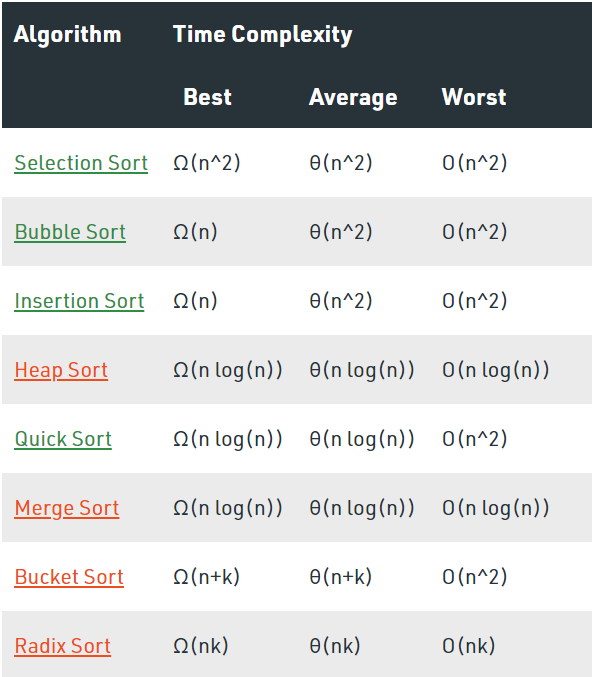